# <font color=black> Figure 3 - Brain and spinal cord morphometry </font>
<hr style="border:1px solid black">

### Imports

In [23]:
import sys,json
#import glob, os
import pandas as pd
import numpy as np


main_dir="/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project/"
sys.path.append(main_dir + "2025_brsc_aging_project/code/")
from brain_post_cat12 import post_Cat12
from sc_structural_analyses import StructuralMetrics

#statistics
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from brsc_statistics import Statistics

# plotting
from matplotlib.colors import LinearSegmentedColormap
from plotting import Plotting
import matplotlib.pyplot as plt

# 
#from scipy.stats import spearmanr
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load config file ------------------------------------------------------------
config_file=main_dir + '/2025_brsc_aging_project/config/analyses/brsc_structural.json'
with open(config_file) as config_f: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_f) # load config file should be open first and the path inside modified



plot=Plotting(config_file,"test")
stat=Statistics(config=config,ana_dir="",analysis="")
post_cat12=post_Cat12(config=config)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Your are going to run the analysis here:
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project/ /figures/f01_structural/preprint2025/brain/


<hr style="border:1px solid black">

## <font color=#0B7CC3> A. Brain volume (in ml)
#### Load cat12 files

In [9]:
df_rois={}
for atlas_name in ["Schaefer2018_200Parcels_7Networks_order", "cobra"]:
    o_tag="_cobra" if atlas_name=="cobra" else "_Schaefer200"
    df_rois[atlas_name]=post_cat12.read_catROI(atlas_name=atlas_name,o_tag=o_tag,redo=False)
cobra_network=pd.read_csv(config["project_dir"] + "/templates/MNI/atlas/cobra/cobra.txt",delimiter="\t")
df_rois["cobra"]["networks"]=np.tile(cobra_network["networks"].values, len(config["participants_IDs_ALL"]))
brain_rois=pd.concat((df_rois["Schaefer2018_200Parcels_7Networks_order"],df_rois["cobra"]))
brain_grouped=brain_rois.groupby(["IDs","age","sex","networks"], sort=False)[["Vgm","Vwm"]].sum().reset_index()
brain_grouped["value"]=brain_grouped["Vgm"]

### Load spinal cord results

In [13]:
config["participants_IDs_T2s"]=config["participants_IDs_ALL"]
sc_morpho=StructuralMetrics(config,contrast="T2s") # initialize the function
files,df_csa=sc_morpho.compute_csa(i_tag="gm",n_jobs=1,redo_indiv=False)
df_csa_grouped=df_csa[(df_csa["level_labels"]!="C1") & (df_csa["level_labels"]!="C8")].groupby(["IDs","age","sex","groups"], sort=False)[["MEAN(area)"]].mean().reset_index()
df_csa_grouped["networks"]="SpinalCord"
df_csa_grouped["value"]=df_csa_grouped["MEAN(area)"]

df_morpho_all=pd.concat((brain_grouped,df_csa_grouped),axis=0)

Your are going to run the analysis here:
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project/ /figures/f01_structural/preprint2025/t2s/

Start the analysis on: 67 participants
/cerebro/cerebro1/dataset/bmpd/derivatives/Aging_project//figures/f01_structural/preprint2025/t2s//2_second_level//csa//n67_gm_csa.csv


#### Plot brain results (SomMot)

Processing network: Vis
t-value (age): -4.73, p-value (age): 0.00001266


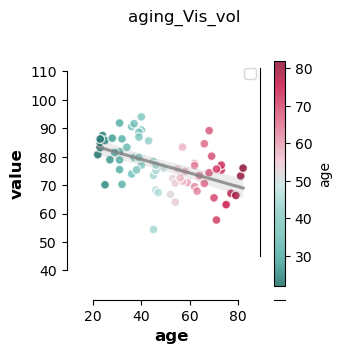

Processing network: SomMot
t-value (age): -6.50, p-value (age): 0.00000001


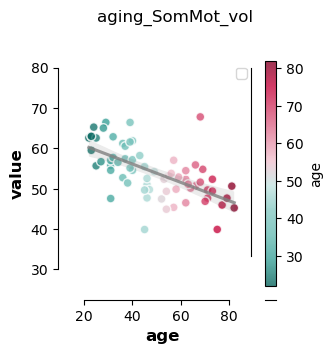

Processing network: DorsAttn
t-value (age): -6.05, p-value (age): 0.00000008


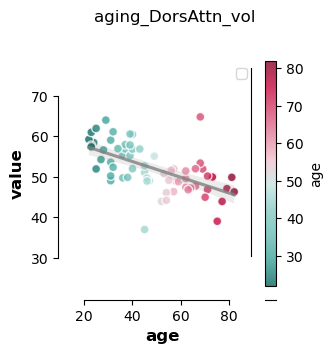

Processing network: SalVentAttn
t-value (age): -6.11, p-value (age): 0.00000007


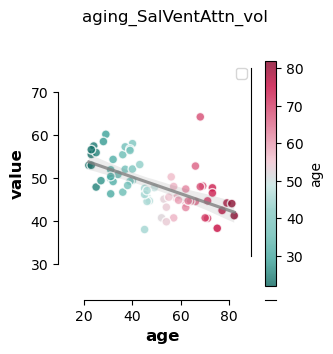

Processing network: Limbic
t-value (age): -3.66, p-value (age): 0.00050907


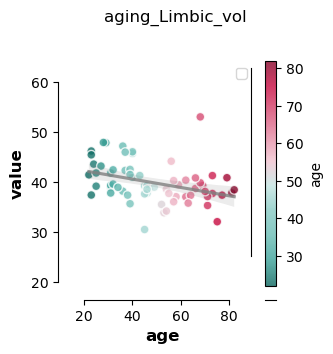

Processing network: Cont
t-value (age): -5.55, p-value (age): 0.00000060


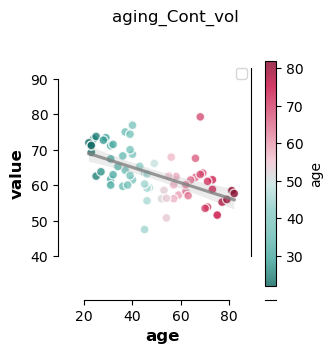

Processing network: Default
t-value (age): -6.10, p-value (age): 0.00000007


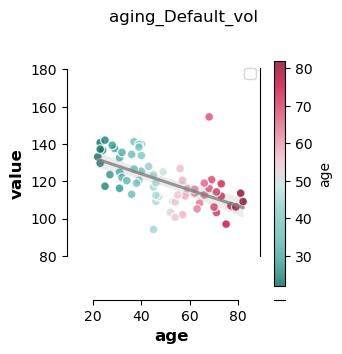

Processing network: Subcortical
t-value (age): -3.50, p-value (age): 0.00085452


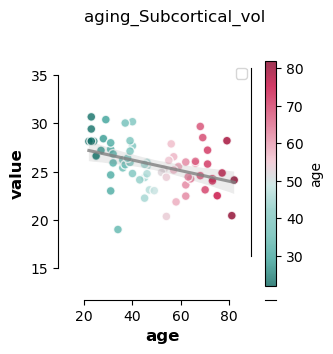

Processing network: Cerebellum
t-value (age): -2.62, p-value (age): 0.01102818


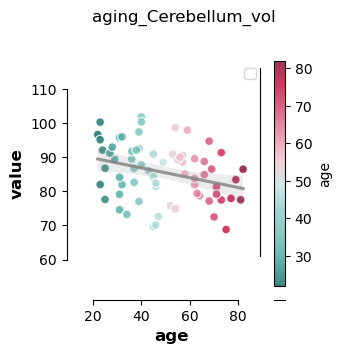

Processing network: SpinalCord
t-value (age): -3.53, p-value (age): 0.00078415


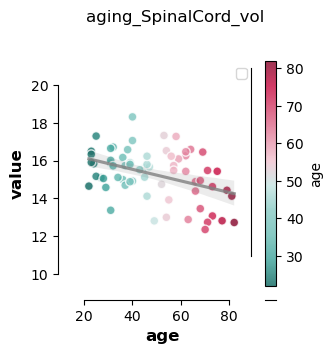

       network  tvalue_age         p_age     p_age_fdr  age_significant_fdr
0          Vis   -4.732799  1.266370e-05  2.110617e-05                 True
1       SomMot   -6.495940  1.413271e-08  1.413271e-07                 True
2     DorsAttn   -6.054801  8.164050e-08  2.041013e-07                 True
3  SalVentAttn   -6.112075  6.510706e-08  2.041013e-07                 True
4       Limbic   -3.662045  5.090704e-04  7.272435e-04                 True
5         Cont   -5.545680  5.960377e-07  1.192075e-06                 True
6      Default   -6.104275  6.714678e-08  2.041013e-07                 True
7  Subcortical   -3.499358  8.545217e-04  9.494686e-04                 True
8   Cerebellum   -2.617962  1.102818e-02  1.102818e-02                 True
9   SpinalCord   -3.526638  7.841495e-04  9.494686e-04                 True
       network  tvalue_sex     p_sex  p_sex_fdr  sex_significant_fdr
0          Vis    2.020720  0.047497   0.088087                False
1       SomMot    1.972705

In [21]:
from statsmodels.stats.multitest import fdrcorrection
colors = ["#0C675F","#3AA198","#68BCB4","#86C9C3","#C3E4E1","#F1C2CF","#E3849F","#D5476F","#C7093F","#850429"]  # blue → white → red
custom_cmap = LinearSegmentedColormap.from_list("my_colormap", colors)
output_dir=config["project_dir"] +config["analysis_dir"]['cat12'].split("brain")[0] + "/figures/"

roi_results = [];p_age_list=[];p_sex_list=[]
all_results_df = pd.DataFrame()  # should be a DataFrame, not dict
network_df = {}  # this is fine as dict

for network in ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont',
       'Default', 'Subcortical', 'Cerebellum',"SpinalCord"]:
    print(f"Processing network: {network}")
    
    network_df[network] = df_morpho_all[df_morpho_all["networks"] == network].reset_index(drop=True)
    signed_r2, p_age, p_sex, beta_age, beta_sex, t_age, t_sex = stat.signed_partial_r2(
        df=network_df[network], y="value", predictor="age", covariates=["sex"]
    )
    
    roi_results.append({"network": network, "signed_r2": signed_r2,
        "p_age": p_age,"p_sex": p_sex,
        "beta_age": beta_age,"beta_sex": beta_sex,
        "tvalue_age": t_age,"tvalue_sex": t_sex})
    p_age_list.append(p_age)
    p_sex_list.append(p_sex)

    print(f"t-value (age): {t_age:.2f}, p-value (age): {p_age:.8f}")

    # Plot
    plot.lmplots(
        df=network_df[network],
        x_data="age",y_data="value",
        color=["grey"],
        hue_color_var="age",hue_palette=custom_cmap,
        xmin=15,xmax=90,
        output_dir=output_dir,
        output_tag="aging_" + network + "_vol",
        indiv_values=True,save=True)

roi_results_df = pd.DataFrame(roi_results)

# FDR correction on all age p-values
rejected, pvals_fdr = fdrcorrection(p_age_list, alpha=0.05)
rejected_sex, pvals_fdr_sex = fdrcorrection(p_sex_list, alpha=0.05)

# Add corrected p-values to result dicts
for i, result in enumerate(roi_results):
    result["p_age_fdr"] = pvals_fdr[i]
    result["age_significant_fdr"] = rejected[i]
    result["p_sex_fdr"] = pvals_fdr_sex[i]
    result["sex_significant_fdr"] = rejected_sex[i]
    
roi_df = pd.DataFrame(roi_results)
print(roi_df[["network", "tvalue_age","p_age", "p_age_fdr", "age_significant_fdr"]])
print(roi_df[["network", "tvalue_sex","p_sex", "p_sex_fdr", "sex_significant_fdr"]])


<hr style="border:1px solid black">

## <font color=#0B7CC3> B.  Link brain / spinal cord


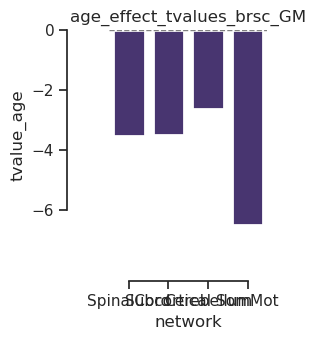

In [24]:
color=["#452B7A","#452B7A","#452B7A","#452B7A"]
plot.barplots(df=roi_results_df, x_data="network",x_order=["SpinalCord","Subcortical","Cerebellum","SomMot"], #x_order=["ventral","dorsal","within","cross"],
                  y_data="tvalue_age",
                  palette=color,
                  ymin=-7,ymax=0,indiv_values=False,
                output_dir=output_dir ,
                  #height=3,aspect=0.5,
                  output_tag="age_effect_tvalues_brsc_GM",save=False)
plt.show()


                            OLS Regression Results                            
Dep. Variable:             SpinalCord   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     4.369
Date:                Thu, 30 Oct 2025   Prob (F-statistic):            0.00355
Time:                        10:37:40   Log-Likelihood:                -104.02
No. Observations:                  67   AIC:                             218.0
Df Residuals:                      62   BIC:                             229.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0139      4.262      5.634      0.0

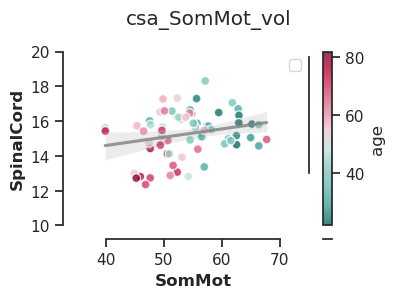

                            OLS Regression Results                            
Dep. Variable:             SpinalCord   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     3.875
Date:                Thu, 30 Oct 2025   Prob (F-statistic):            0.00713
Time:                        10:37:40   Log-Likelihood:                -104.86
No. Observations:                  67   AIC:                             219.7
Df Residuals:                      62   BIC:                             230.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.7413      4.721     

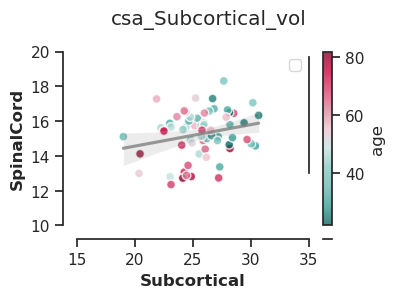

                            OLS Regression Results                            
Dep. Variable:             SpinalCord   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     6.221
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           0.000283
Time:                        10:37:40   Log-Likelihood:                -101.03
No. Observations:                  67   AIC:                             212.1
Df Residuals:                      62   BIC:                             223.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.8085      4.694      4.

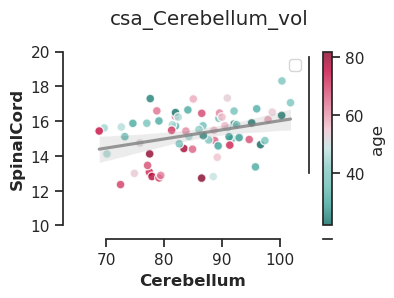

In [28]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

colors = ["#0C675F","#3AA198","#68BCB4","#86C9C3","#C3E4E1","#F1C2CF","#E3849F","#D5476F","#C7093F","#850429"]  # blue → white → red
custom_cmap = LinearSegmentedColormap.from_list("my_colormap", colors)

networks_to_keep = ["SomMot", "Subcortical", "Cerebellum", "SpinalCord"]  # customize as needed
df_filtered = df_morpho_all[df_morpho_all['networks'].isin(networks_to_keep)]
df_pivot = df_filtered.pivot_table(index=['IDs', 'age', 'sex'],columns='networks',values='value').reset_index()



#---- Plot resuts and compute stats
limits={"SomMot":[35,75], "Subcortical":[15,35], "Cerebellum":[65,105]}
for network_nb,network in enumerate(networks_to_keep[:-1]):
    model = smf.ols('SpinalCord ~ ' + network+' * age + sex', data=df_pivot).fit()
    print(model.summary())



    plot.lmplots(df=df_pivot,
                 x_data=network,
                 y_data="SpinalCord", 
                 color=["grey"],hue_color_var="age",hue_palette=custom_cmap,
                 height=2.5,aspect=1.5,
                 ymin=10,ymax=20,
                 xmin=limits[network][0],xmax=limits[network][1],
             indiv_values=True,
                  output_dir=output_dir,output_tag="csa_" + network + "_vol",
                 save=True)
    
    #print(model.summary()) 
